In [ ]:
"""Question 2"""

In [5]:
import numpy as np
import pandas as pd
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
import os

In [19]:
# Download all documents
document = np.load("F:/Annie/CornellMS/Semester 4/Machine Learning/Homework/HW3/Clustering/science2k-doc-word.npy")
vocabulary = pd.read_table('F:/Annie/CornellMS/Semester 4/Machine Learning/Homework/HW3/Clustering/science2k-vocab.txt', header=None).values
titles = pd.read_table('F:/Annie/CornellMS/Semester 4/Machine Learning/Homework/HW3/Clustering/science2k-titles.txt', header=None).values
document.shape

(1373, 5476)

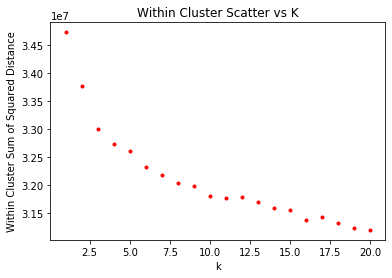

In [3]:
#a : Cluster the documents using k-means and various values of k 
def cluster_k(data,max_k): 
    sum_of_sq_dist = []
    for k in range(1,max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        sum_of_sq_dist.append(kmeans.inertia_) 
    plt.plot(range(1,max_k+1), sum_of_sq_dist, 'r.')
    plt.xlabel('k')
    plt.ylabel('Within Cluster Sum of Squared Distance')
    plt.title('Within Cluster Scatter vs K')
    plt.show()

cluster_k(document,20)

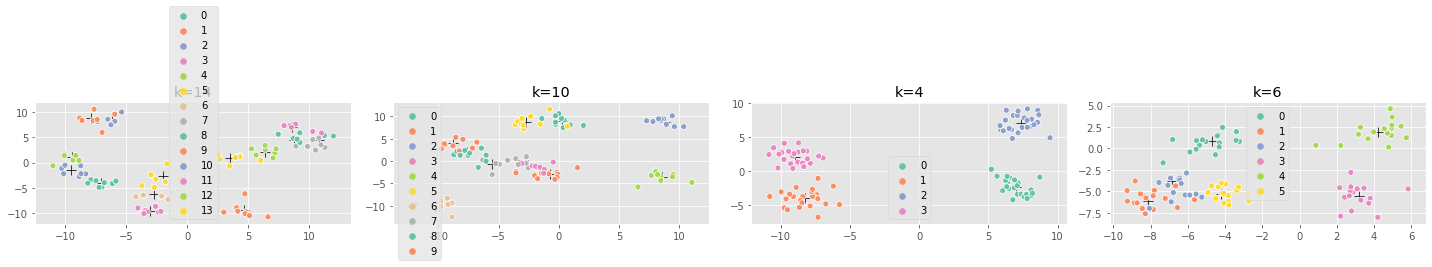

In [6]:
# plot for various values of k
def mean_plots(data):
    plt.style.use('ggplot')
    x=data
    plt.figure(figsize=(20, 3))
    for k in range(4):
        K = random.randint(1,20)
        x, y = make_blobs(centers=K)
        kmeans = KMeans(n_clusters=K, random_state=0).fit(x) 
        plt.subplot(1,4,k+1)
        sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='+', color='black', s=100);
        sns.scatterplot(x[:,0], x[:,1], hue=y, palette=sns.color_palette("Set2", n_colors=K));
        plt.title('k={}'.format(K))
    plt.tight_layout()
    plt.show()

mean_plots(document)

In [7]:
"""We see k=4, gives very reasonable output, with distinct seperation. Hence, the k we select is 4"""

'We see k=4, gives very reasonable output, with distinct seperation. Hence, the k we select is 4'

In [9]:
# calculate how many documnents fall in each bins
kmeans_bin = KMeans(n_clusters=4, random_state=0).fit(document)
np.bincount(kmeans_bin.labels_)

array([371, 230, 559, 213], dtype=int64)

In [16]:
# Return the top 10 features
center = np.mean(document, axis=0)
for i in range(4):
    largest = np.argsort(kmeans_bin.cluster_centers_[i] - center)[::-1][:10]
    print( i+1,vocabulary[largest].reshape(1,-1), "\n")

1 [['protein' 'cell' 'cells' 'expression' 'proteins' 'fig' 'gene'
  'expressed' 'binding' 'specific']] 

2 [['fig' 'values' 'period' 'mean' 'lower' 'average' 'estimates' 'range'
  'estimate' 'indicate']] 

3 [['says' 'mail' 'researchers' 'scientists' 'years' 'news' 'people'
  'issue' 'year' 'world']] 

4 [['energy' 'electron' 'fig' 'density' 'temperature' 'shows' 'structure'
  'measured' 'constant' 'measurements']] 



In [17]:
"""We see a distinctive pattern, the first group representing Biology, the forth representing Atomic Chemistry or Physics. The clustering is bringing out some unique connection."""

'We see a distinctive pattern, the first group representing Biology, the forth representing Atomic Chemistry or Physics. The clustering is bringing out some unique connection.'

In [20]:
# Return the top 10 closest documents to each centroid
for i in range(4):
    d = kmeans_bin.transform(document)[:, i]
    ind = np.argsort(d)[:10]
    print(i+1, titles[ind], "\n" )

1 [['Requirement of NAD and SIR2 for Life-Span Extension by Calorie Restriction in Saccharomyces Cerevisiae']
 ['Suppression of Mutations in Mitochondrial DNA by tRNAs Imported from the Cytoplasm']
 ['Thermal, Catalytic, Regiospecific Functionalization of Alkanes']
 ['Algorithmic Gladiators Vie for Digital Glory']
 ['Reopening the Darkest Chapter in German Science']
 ['Similar Requirements of a Plant Symbiont and a Mammalian Pathogen for Prolonged Intracellular Survival']
 ['Mothers Setting Boundaries']
 ['Turning up the Heat on Histoplasma capsulatum']
 ['Distinct Classes of Yeast Promoters Revealed by Differential TAF Recruitment']
 ['An Arresting Start for MAPK']] 

2 [['Algorithmic Gladiators Vie for Digital Glory']
 ['Reopening the Darkest Chapter in German Science']
 ['Population Dynamical Consequences of Climate Change for a Small Temperate Songbird']
 ['The Formation of Chondrules at High Gas Pressures in the Solar Nebula']
 ['Subducted Seamount Imaged in the Rupture Zone of th

In [21]:
"""The clustering shown by documents are not very good! It shows multiple repitition for same title. There is a pattern but not very distinct as features. We still see a little Biology clustering in 1 and Physics clustering in 4."""

'The clustering shown by documents are not very good! It shows multiple repitition for same title. There is a pattern but not very distinct as features. We still see a little Biology clustering in 1 and Physics clustering in 4.'

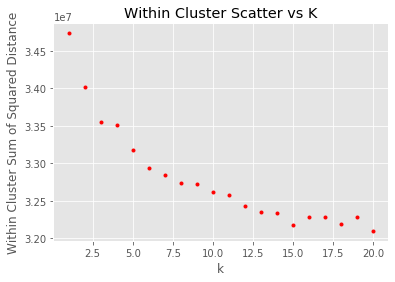

In [23]:
#b : Repeat analysis for term-wise matrix
term = np.load("F:/Annie/CornellMS/Semester 4/Machine Learning/Homework/HW3/Clustering/science2k-word-doc.npy")
cluster_k(term, 20)

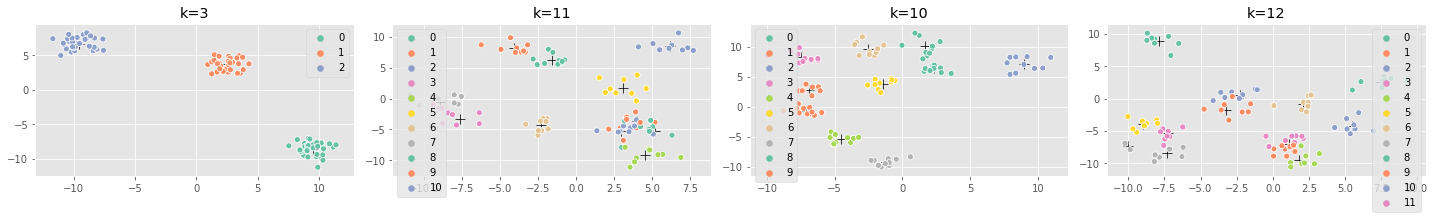

In [26]:
# Separation of clusters
mean_plots(term)

In [28]:
"""Plot with k=3 looks the best for me. k=10 also looks good but intercluster distance is not so good. Hence, we go with k=3"""

'Plot with k=3 looks the best for me. k=10 also looks good but intercluster distance is not so good. Hence, we go with k=3'

In [34]:
# Dividing into bins
kmeans_bin2 = KMeans(n_clusters=3, random_state=0).fit(term_mat)
np.bincount(kmeans_bin2.labels_)

array([ 523, 4275,  678], dtype=int64)

In [35]:
# Top features
center2 = np.mean(term, axis=0)
for i in range(3):
    largest = np.argsort(kmeans_bin2.cluster_centers_[i] - center2)[::-1][:10]
    print( i+1,vocabulary[largest], "\n")

1 [['adult']
 ['spectrum']
 ['national']
 ['suggested']
 ['mars']
 ['ratios']
 ['provide']
 ['century']
 ['mass']
 ['extended']] 

2 [['mediated']
 ['conserved']
 ['width']
 ['strongly']
 ['past']
 ['environmental']
 ['interactions']
 ['separated']
 ['atom']
 ['contact']] 

3 [['question']
 ['frequency']
 ['people']
 ['high']
 ['coding']
 ['new']
 ['bar']
 ['self']
 ['knowledge']
 ['quantum']] 



In [36]:
"""The term seems to be clustering, but with only top 10 words it is difficult to predict the groups. Hence, we need more words to deduce the exact field of study."""

'The term seems to be clustering, but with only top 10 words it is difficult to predict the groups. Hence, we need more words to deduce the exact field of study.'

In [32]:
# Top titles
center2 = np.mean(term, axis=0)
for i in range(3):
    largest = np.argsort(kmeans_bin2.cluster_centers_[i] - center2)[::-1][:10]
    print( i+1,titles[largest], "\n")

1 [['Noxa, a BH3-Only Member of the Bcl-2 Family and Candidate Mediator of p53-Induced Apoptosis']
 ['Positional Syntenic Cloning and Functional Characterization of the Mammalian Circadian Mutation tau']
 ['Central Role for G Protein-Coupled Phosphoinositide 3-Kinase g in Inflammation']
 ['Kinesin Superfamily Motor Protein KIF17 and mLin-10 in NMDA Receptor-Containing Vesicle Transport']
 ['Regulated Cleavage of a Contact-Mediated Axon Repellent']
 ['Role of the Mouse ank Gene in Control of Tissue Calcification and Arthritis']
 ['An Oral Vaccine against NMDAR1 with Efficacy in Experimental Stroke and Epilepsy']
 ['Requirement of JNK for Stress-Induced Activation of the Cytochrome c-Mediated Death Pathway']
 ['Function of PI3Kg in Thymocyte Development, T Cell Activation, and Neutrophil Migration']
 ['Regulation of STAT3 by Direct Binding to the Rac1 GTPase']] 

2 [['National Academy of Sciences Elects New Members']
 ['NIH, under Pressure, Boosts Minority Health Research']
 ['Science Su

In [37]:
"""The grouping of the title seems better than the previous. We can understand the groups and fields better. For example, the first one seems to be Biological Pathway, the second seems to be major break-throughs and third seems a field with Geography and Physics in it."""

'The grouping of the title seems better than the previous. We can understand the groups and fields better. For example, the first one seems to be Biological Pathway, the second seems to be major break-throughs and third seems a field with Geography and Physics in it.'